# Importing Libraries and Packages


In [85]:
import pandas as pd
import numpy as np
import collections

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso



from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import IsolationForest
from numpy import where

 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import os
import category_encoders as ce
from tqdm import tqdm_notebook



from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict
)
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC
)
from yellowbrick.model_selection import (
    LearningCurve 
)

from seaborn import diverging_palette

# Importing Dataset


In [86]:
df = pd.read_csv('D://Downloads//SBAnational.csv',low_memory=False)

In [87]:
df.head()

LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   

   ...  RevLineCr  LowDoc  ChgOffDate  DisbursementDate  DisbursementGross  \
0  ...          N       Y         NaN         28-Feb-99        $60,000.00    
1  ...          N       Y         NaN         31-May-97        $40,000.00    
2  ...          N       N         NaN         31-Dec-97       $287,000.00    
3  ...          N       Y         NaN         30-Jun-97        $35,000.00    
4  ...          N       N         NaN         14-May-97       $229,000.00    

   BalanceGross  MIS_Status ChgOffPrinGr        GrAppv      SBA_Appv  
0        $0.00        P I F       $0.00    $60,000.00    $48,000.00   
1        $0.00        P I F       $0.00    $40,000.00    $32,000.00   
2        $0.00        P I F       $0.00   $287,000.00   $215,250.00   
3        $0.00        P I F       $0.00    $35,000.00    $28,000.00   
4        $0.00        P I F       $0.00   $229,000.00   $229,000.00   

[5 rows x 27 columns]

# Checking Datatype, Shape, Column Names

In [88]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [89]:
df.shape

(899164, 27)

In [90]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

# Data Dictionary

# Data Exploration

## Provide Descriptive Statistics

In [91]:
df.describe()

LoanNr_ChkDgt            Zip          NAICS           Term  \
count   8.991640e+05  899164.000000  899164.000000  899164.000000   
mean    4.772612e+09   53804.391241  398660.950146     110.773078   
std     2.538175e+09   31184.159152  263318.312759      78.857305   
min     1.000014e+09       0.000000       0.000000       0.000000   
25%     2.589758e+09   27587.000000  235210.000000      60.000000   
50%     4.361439e+09   55410.000000  445310.000000      84.000000   
75%     6.904627e+09   83704.000000  561730.000000     120.000000   
max     9.996003e+09   99999.000000  928120.000000     569.000000   

               NoEmp       NewExist      CreateJob    RetainedJob  \
count  899164.000000  899028.000000  899164.000000  899164.000000   
mean       11.411353       1.280404       8.430376      10.797257   
std        74.108196       0.451750     236.688165     237.120600   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       1.000000       0.000000       0.000000   
50%         4.000000       1.000000       0.000000       1.000000   
75%        10.000000       2.000000       1.000000       4.000000   
max      9999.000000       2.000000    8800.000000    9500.000000   

       FranchiseCode     UrbanRural  
count  899164.000000  899164.000000  
mean     2753.725933       0.757748  
std     12758.019136       0.646436  
min         0.000000       0.000000  
25%         1.000000       0.000000  
50%         1.000000       1.000000  
75%         1.000000       1.000000  
max     99999.000000       2.000000

## Check for missing values 

In [92]:
# Check for NA's
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

## Visialize Missing Values 
The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

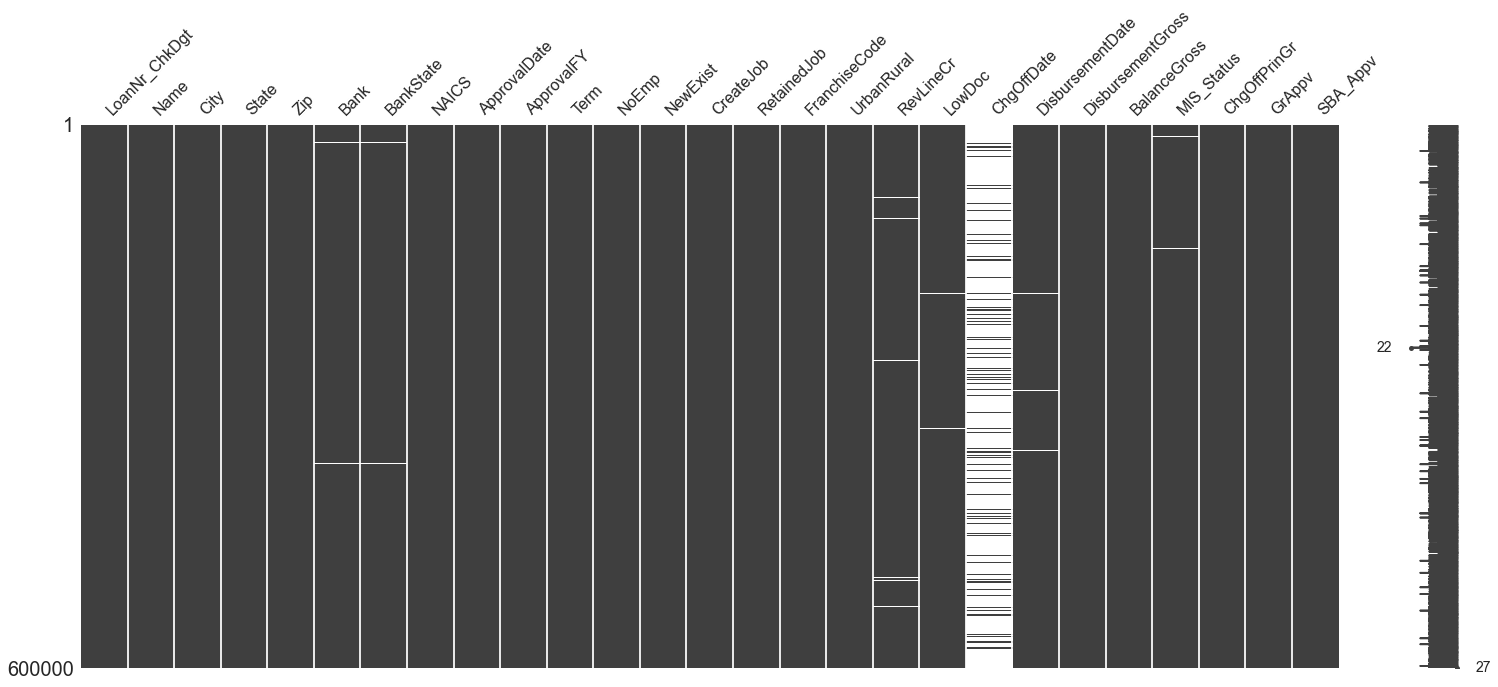

In [93]:
import missingno as msno
ax = msno.matrix(df.sample(600000))

In [94]:
#Defining function to calculate missing value statistics
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns



In [95]:
# Missing values statistics
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 27 columns.
There are 11 columns that have missing values.


Missing Values  % of Total Values
ChgOffDate                736465               81.9
RevLineCr                   4528                0.5
LowDoc                      2582                0.3
DisbursementDate            2368                0.3
MIS_Status                  1997                0.2
BankState                   1566                0.2
Bank                        1559                0.2
NewExist                     136                0.0
City                          30                0.0
Name                          14                0.0
State                         14                0.0

<AxesSubplot:>

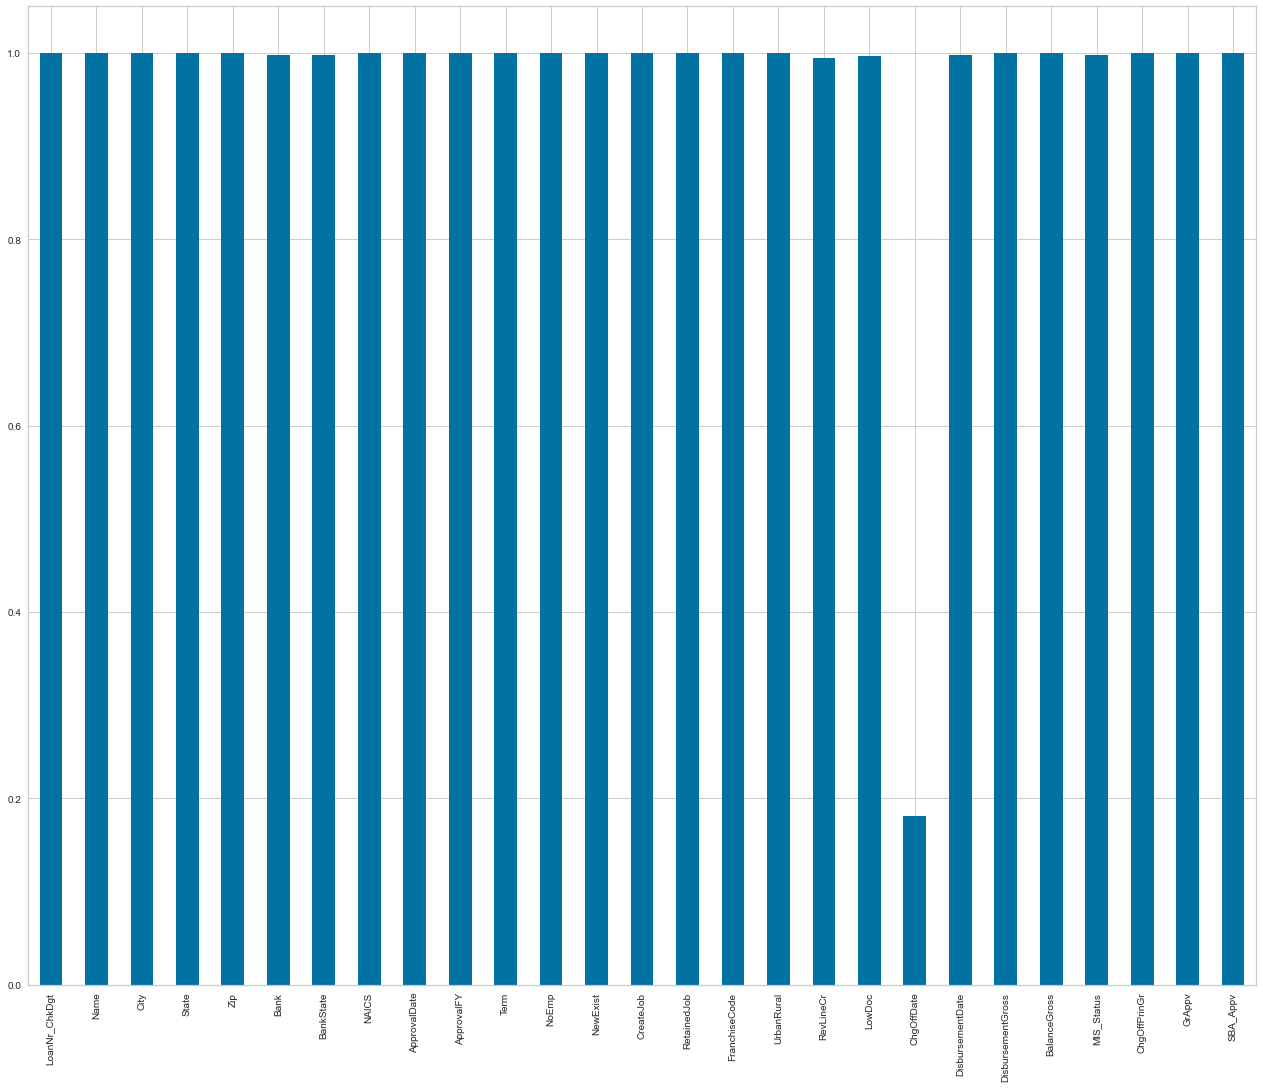

In [96]:
fig, ax = plt.subplots(figsize=(22, 18))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax)

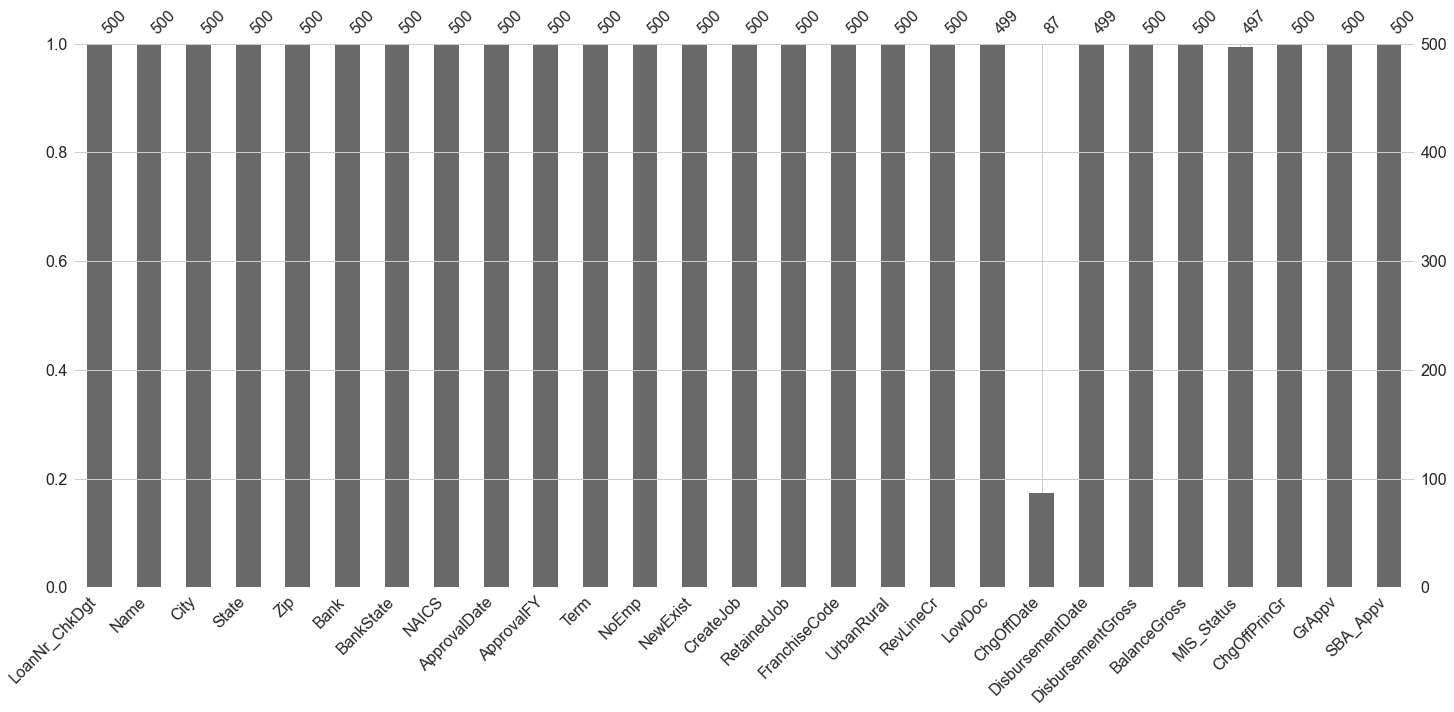

In [97]:
ax = msno.bar(df.sample(500))

# Correlation Matrix

<AxesSubplot:>

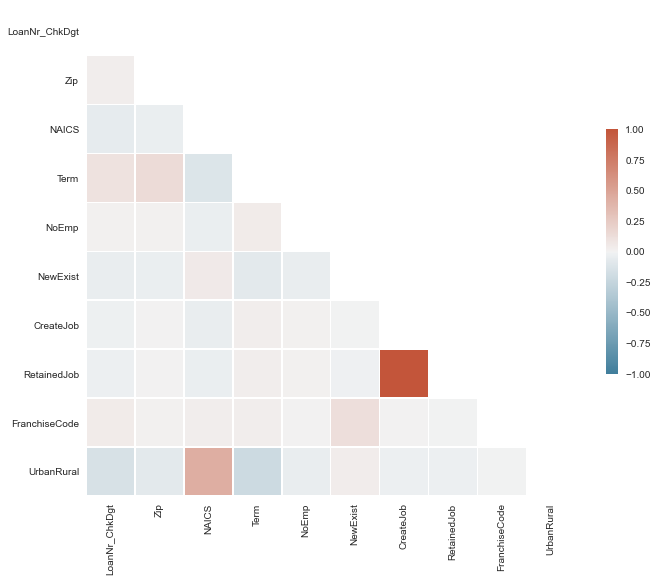

In [98]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Pandas Profiling 

In [99]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_notebook_iframe()
profile.to_file("your_report.html")

In [100]:
#Checking different values in the Target Variable (MIS_Status)
collections.Counter(df.MIS_Status).keys()

dict_keys(['P I F', 'CHGOFF', nan])

In [101]:
#Checking the count of different values in the Target Variable (MIS_Status)
collections.Counter(df.MIS_Status).values()

dict_values([739609, 157558, 1997])

In [102]:
#We have only 157558 observations where a company has defaulted(CHGOFF) on the loan. Also we have 1997 NA values in our target variable.

# Data Transformation and Preprocessing

In [103]:
df.head()
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

## Dropping rows having NA's in City and Target Variable MIS_Status 

In [104]:
df = df.dropna(axis =0, subset=['City','MIS_Status'])

## Target Variable (MIS_Status)- Assigning 1= If loan was Paid Fully, 0= Company defaulted on loan 

In [105]:
loan_status = {'P I F': 1,'CHGOFF': 0} 
df.MIS_Status = [loan_status[item] for item in df.MIS_Status]

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Converting the currency values to float. (Currently they are in $) 

In [106]:
temp = [21,22,24,25,26] #To convert to float.
for i in temp:
    df[df.columns[i]] = df[df.columns[i]].replace('[\$,]', '', regex=True).astype(float) 

<ipython-input-106-69b558c3d82c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns[i]] = df[df.columns[i]].replace('[\$,]', '', regex=True).astype(float)


## Column name has no significance in  our analysis hence, dropping it 

In [107]:
df = df.drop(axis =1, columns = ['Name','ChgOffDate'])

## change fiscal year of commitment from object to int 

In [108]:
df['ApprovalFY'] = df['ApprovalFY'].replace({'A':'','B':''}, regex = True).astype(int)

## change new vs existing business from 1 and 2 to 1(new) and 0(existing) for interpretability 

In [109]:
df['NewExist'] = df['NewExist'].replace(1,0)
df['NewExist'] = df['NewExist'].replace(2,1)

## change RevLineCR to binary variable 

In [110]:
ore = ce.OrdinalEncoder(
mapping=[
{
"col": "RevLineCr",
"mapping": {
"Y": 0,
"N": 1

},
}
]
)
df=ore.fit_transform(df)

## change LowDoc to binary variable 

In [111]:
ore = ce.OrdinalEncoder(
mapping=[
{
"col": "LowDoc",
"mapping": {
"Y": 0,
"N": 1

},
}
]
)
df=ore.fit_transform(df)

## make franchise a binary variable

In [112]:
df['FranchiseCode'] = df['FranchiseCode'].replace(1,0)
df['FranchiseCode'] = np.where((df.FranchiseCode != 0),1,df.FranchiseCode)
df.rename(columns={"FranchiseCode":"Franchise"},inplace=True)

## Transform NAICS code to industry and get dummies

In [113]:
# Selects only the first two numbers of the NAICS code
df['Industry'] = df['NAICS'].astype('str').apply(lambda x: x[:2])

# Maps the NAICS code to each industry
df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

# Remove records where Industry is NaN (NAICS code was a 0)
df.dropna(subset=['Industry'], inplace=True)

#convert into dummies 
df = pd.get_dummies(df, columns=['Industry'])

## drop columns that dont add value to the prediction or affect the prediction

In [114]:
#columns that occured after signing the loan will be dropped
df = df.drop(['LoanNr_ChkDgt','Bank','GrAppv','DisbursementGross', 'City', 'ApprovalDate', 
              'Zip','BankState', 'DisbursementDate','BalanceGross','NAICS','SBA_Appv'], axis = 1)

## Substituting each state with its corresponding state default value 

In [115]:
state_def = {'MT':.095, 'WY':.1,'VT':.061,'ND':.062,'SD':.106,'ME':.098,
            'NH':.102,'NM':.147,'NE':.181,'AK':.111,'IA':.102,'MN':.082,
            'RI':.062,'WI':.09,'MA':.058,'KS':.116,'WA':.09,'CT':.11,
            'ID':.086,'PA':.092,'OR':.114,'MO':.099,'HI':.093,'OK':.128,
            'MS':.149,'WV':.146,'OH':.111,'AL':.133,'AR':.104,'IN':.142,
            'UT':.075,'DE':.088,'CA':.087,'CO':.108,'VA':0.098,'LA':.134,
            'NC':.105,'TX':.104,'MD':.093,'KY':.123,'SC':.115,'NY':.086,
            'NJ':.094,'AZ':.114,'TN':.115,'MI':.115,'NV':.181,'IL':.095,
            'GA':.108,'DC':.082,'FL':.073} 
df['State'] = df['State'].map(state_def)

df = df.rename(columns={'State':'State Default Rate',})

## Imputing missing values with median

In [116]:
df=df.fillna(df.median())

## Specify our target variable and predictors 

In [117]:
y = df['MIS_Status']
X = df.drop(['MIS_Status'], axis = 1)

## Mutual Information 

<AxesSubplot:ylabel='feature'>

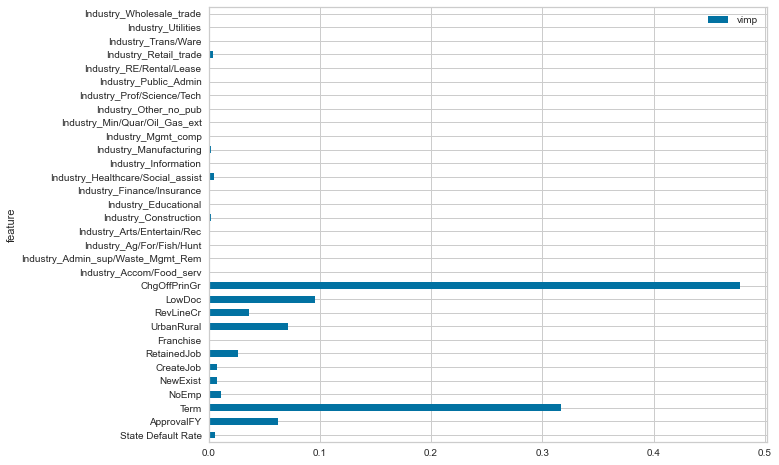

In [118]:
from sklearn import feature_selection
mic = feature_selection.mutual_info_classif(
 X, y
)
fig, ax = plt.subplots(figsize=(10, 8))
(
 pd.DataFrame(
 {"feature": X.columns, "vimp": mic}
 )
 .set_index("feature")
 .plot.barh(ax=ax)
)

## Removing outliers using Isolation Forest 

In [119]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_col = X.select_dtypes(include=numerics)
iforest=IsolationForest(n_estimators=100,contamination=0.02)

pred=iforest.fit_predict(num_col)
score=iforest.decision_function(num_col)


non_anom_index=where(pred==1)
X=X.iloc[non_anom_index]
y=y.iloc[non_anom_index]

## Feature selection using RFE 

In [120]:
#feature selection
lr = LogisticRegression(max_iter=5000)
rfe = RFE(lr, n_features_to_select=10)
model = rfe.fit(X, y)
model.ranking_
rating=pd.DataFrame(list(zip(X.columns,model.ranking_)), columns = ['predictor','ranking'])


In [121]:
predictors=rating[rating.ranking<14]
list1=predictors.predictor
X=X[X.columns.intersection(list1)]

## Split the data 

In [122]:
X_train, X_val_test, y_train, y_val_test =train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test =train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

## Evaluation Metrics 

### ROC curve 

In [123]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### PR Curve 

In [124]:
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

### Classification Score 

In [125]:
def clf_score(clf, X_train, y_train, X_val, y_val, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))
        
        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_val, clf.predict(X_val))))
        plot_confusion_matrix(clf,  X_val, clf.predict(X_val))
        print("End of validation Result\n")

### Classification Metrics 

In [126]:
def evaluation_metrics(y_actual, y_pred):
            
        precision, recall, _ = precision_recall_curve(y_actual, y_pred)
        average_precision = average_precision_score(y_actual, y_pred)
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_actual, y_pred)
        roc_auc = roc_auc_score(y_actual, y_pred)
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_actual, y_pred)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_actual, y_pred)))

# Modeling

## Baseline Model- Dummy Classifier 

In [127]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="stratified")
dummy_scores = cross_val_score(dummy, X, y)
print(dummy_scores)

[0.67947006 0.67792955 0.68135536 0.67935269 0.68021098]


Validation Result:

accuracy score: 0.4999



D:\Anaconda\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


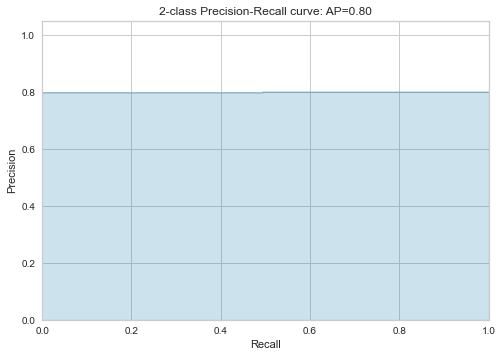

roc auc score: 0.49777420336511713



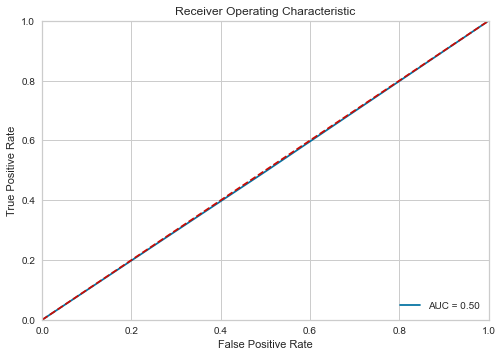

Classification Report: 
               precision    recall  f1-score   support

           0       0.20      0.50      0.29     20395
           1       0.80      0.50      0.62     81843

    accuracy                           0.50    102238
   macro avg       0.50      0.50      0.45    102238
weighted avg       0.68      0.50      0.55    102238


Confusion Matrix: 
 [[10234 10161]
 [40868 40975]]

End of validation Result



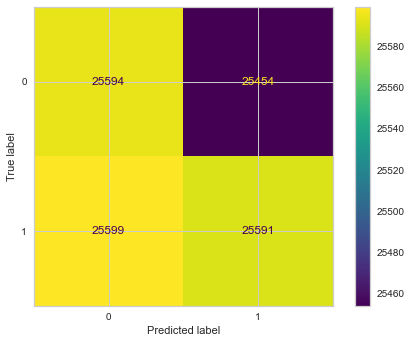

In [128]:
clf_dummy = DummyClassifier()
clf_dummy.fit(X_train_sm, y_train_sm)
clf_score(clf_dummy, X_train_sm, y_train_sm, X_val, y_val, train=False)

## ANN 

In [129]:
max=0
wanted=100
for i in tqdm_notebook(range (2,6)):
    model3 = MLPClassifier(hidden_layer_sizes=(i),max_iter=10)
    scores = cross_val_score(estimator=model3, X=X, y=y, cv=5)
    cross_score=np.average(scores)
    if cross_score>max:
        max=cross_score
        wanted=i
print(max)
print(wanted)

<ipython-input-129-90dfa5421b38>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range (2,6)):


D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Ma


0.7998474156017548
3


D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


## Random Forest 

In [130]:
RF=RandomForestClassifier(random_state=5,n_estimators=100)
model1=RF.fit(X,y)
scores=cross_val_score(estimator=model1,X=X,y=y,cv=5)
cross_score=np.average(scores)
print(cross_score)

0.7919951877228246


Validation Result:

accuracy score: 0.2662



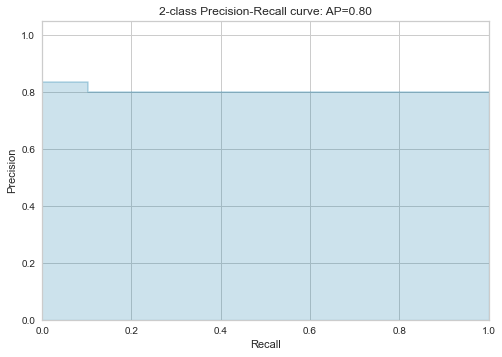

roc auc score: 0.5110857426882329



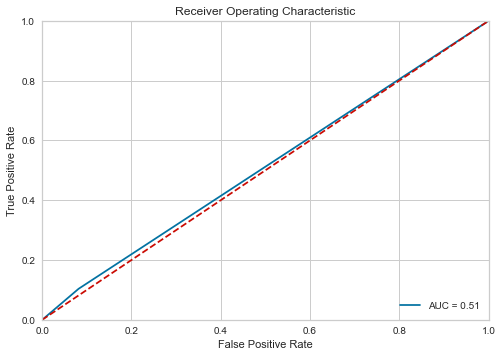

Classification Report: 
               precision    recall  f1-score   support

           0       0.20      0.92      0.33     20395
           1       0.84      0.10      0.18     81843

    accuracy                           0.27    102238
   macro avg       0.52      0.51      0.26    102238
weighted avg       0.71      0.27      0.21    102238


Confusion Matrix: 
 [[18734  1661]
 [73363  8480]]

End of validation Result



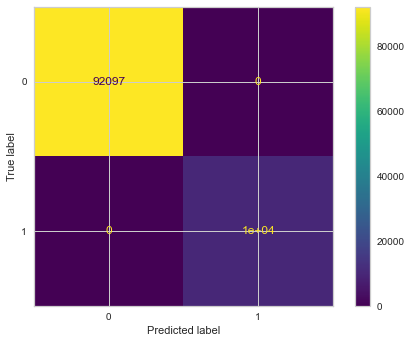

In [131]:
clf_rf = RandomForestClassifier(n_estimators=40, random_state=42)
clf_rf.fit(X_train_sm, y_train_sm)
clf_score(clf_rf, X_train, y_train, X_val, y_val, train=False)

## Logistic Regression 

In [135]:
from sklearn.linear_model import LogisticRegression
clf_log_reg_vanilla = LogisticRegression(C=0.0001, random_state=42)
scores = cross_val_score(estimator=clf_log_reg_vanilla, X=X, y=y, cv=5)
cross_score=np.average(scores)
print(cross_score)

0.7998474156017548


In [155]:
clf_log_reg_vanilla = LogisticRegression(C=0.0001, random_state=42, max_iter=500)
clf_log_reg_vanilla.fit(X_train, y_train)

LogisticRegression(C=0.0001, max_iter=500, random_state=42)

Validation Result:

accuracy score: 0.8005



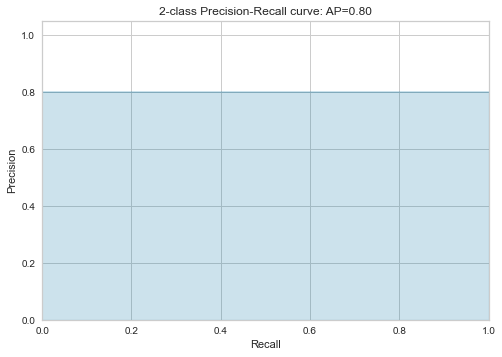

roc auc score: 0.5



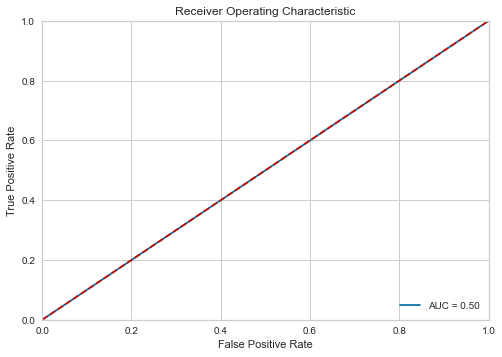

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     20395
           1       0.80      1.00      0.89     81843

    accuracy                           0.80    102238
   macro avg       0.40      0.50      0.44    102238
weighted avg       0.64      0.80      0.71    102238


Confusion Matrix: 
 [[    0 20395]
 [    0 81843]]



ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

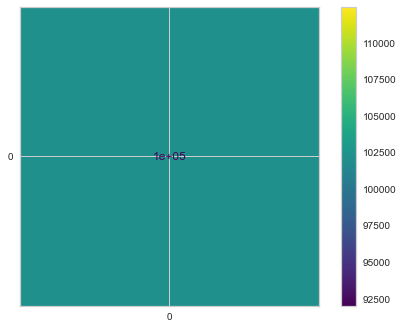

In [156]:
clf_score(clf_log_reg_vanilla, X_train, y_train, X_val, y_val, train=False)

## AdaBoost 

In [145]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada_boost = AdaBoostClassifier(n_estimators=40, random_state=42)
scores = cross_val_score(estimator=clf_ada_boost, X=X, y=y, cv=5)
cross_score=np.average(scores)
print(cross_score)

0.7990258073035109


Validation Result:

accuracy score: 0.8005



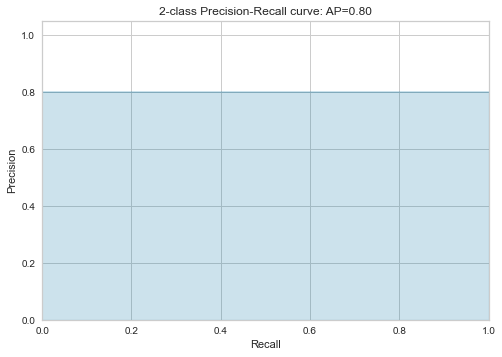

roc auc score: 0.4999877814840609



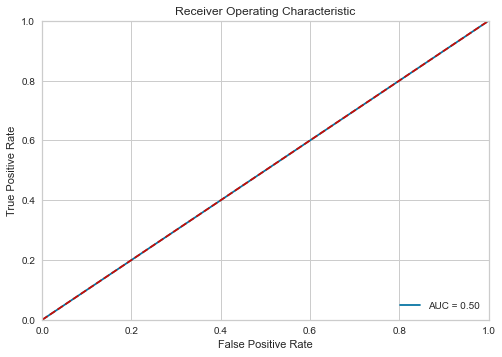

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     20395
           1       0.80      1.00      0.89     81843

    accuracy                           0.80    102238
   macro avg       0.40      0.50      0.44    102238
weighted avg       0.64      0.80      0.71    102238


Confusion Matrix: 
 [[    0 20395]
 [    2 81841]]

End of validation Result



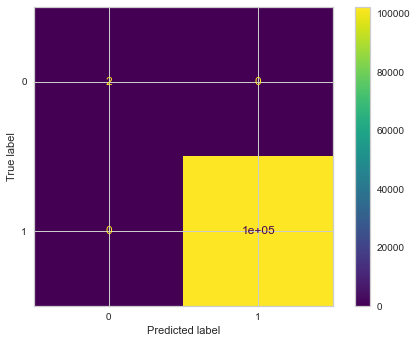

In [154]:
clf_ada_boost = AdaBoostClassifier(n_estimators=40, random_state=42)
clf_ada_boost.fit(X_train, y_train)
clf_score(clf_ada_boost, X_train, y_train, X_val, y_val, train=False)

## Gradient Boosting 

In [151]:
GB=GradientBoostingClassifier(random_state=5,n_estimators=100)
model1=GB.fit(X,y)
scores=cross_val_score(estimator=model1,X=X,y=y,cv=5)
cross_score=np.average(scores)
print(cross_score)

0.7992326765357473


In [152]:
GB=GradientBoostingClassifier(random_state=5,n_estimators=100)
model2=GB.fit(X_train, y_train)

Validation Result:

accuracy score: 0.8006



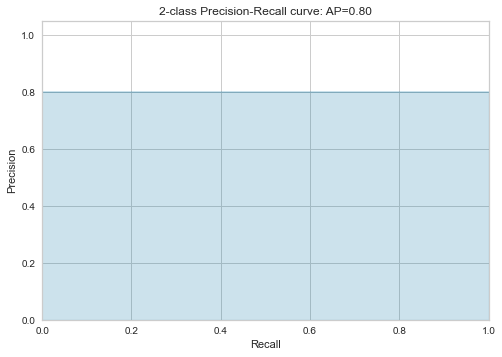

roc auc score: 0.5003249723847012



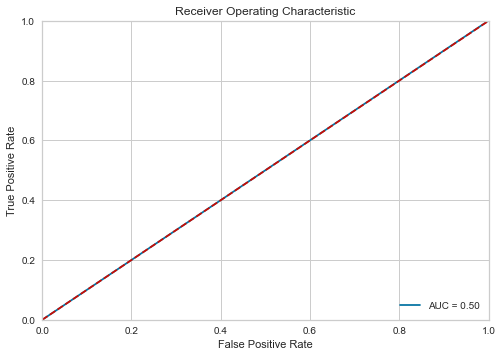

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.00      0.00     20395
           1       0.80      1.00      0.89     81843

    accuracy                           0.80    102238
   macro avg       0.74      0.50      0.45    102238
weighted avg       0.78      0.80      0.71    102238


Confusion Matrix: 
 [[   15 20380]
 [    7 81836]]

End of validation Result



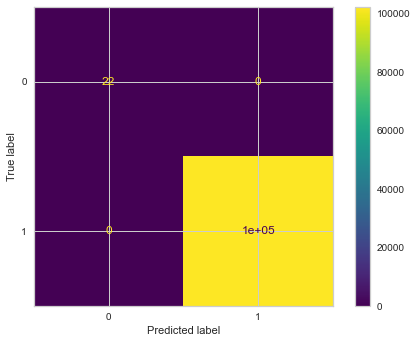

In [153]:
clf_score(model2, X_train, y_train, X_val, y_val, train=False)

### Evaluation Model on test Set 

### Class Prediction Error 

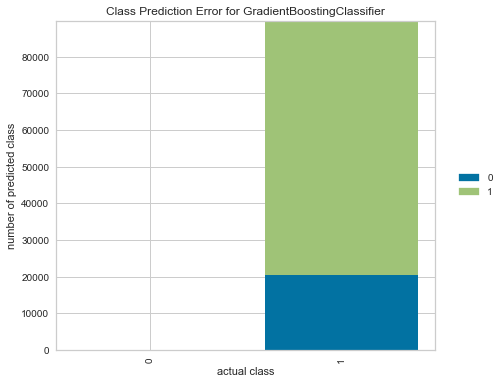

<AxesSubplot:title={'center':'Class Prediction Error for GradientBoostingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [157]:
from yellowbrick.classifier import ClassPredictionError

classes = ["0", "1"]

visualizer = ClassPredictionError(
    model2, classes=classes, is_fitted=True
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Classification Report 

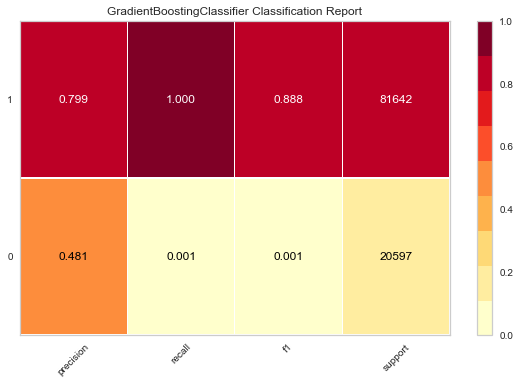

<AxesSubplot:title={'center':'GradientBoostingClassifier Classification Report'}>

In [158]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(
    model2, classes=classes, support=True, is_fitted=True
)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

### Confusion Matrix 

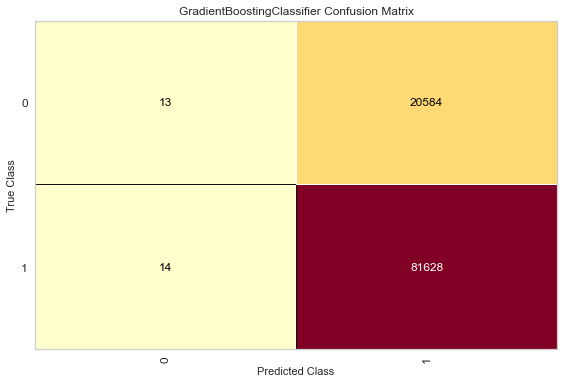

<AxesSubplot:title={'center':'GradientBoostingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [159]:
from yellowbrick.classifier import confusion_matrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model2, classes=[0,1], is_fitted=True)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

### PR Curve 

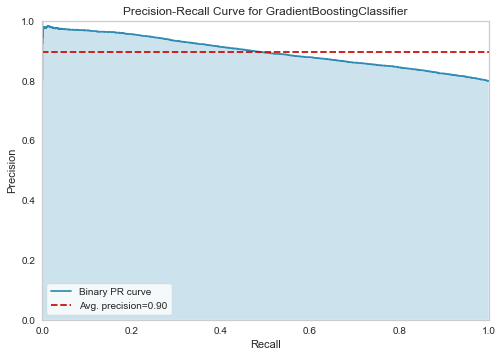

<AxesSubplot:title={'center':'Precision-Recall Curve for GradientBoostingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [160]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model2, is_fitted=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

### ROC-AUC 

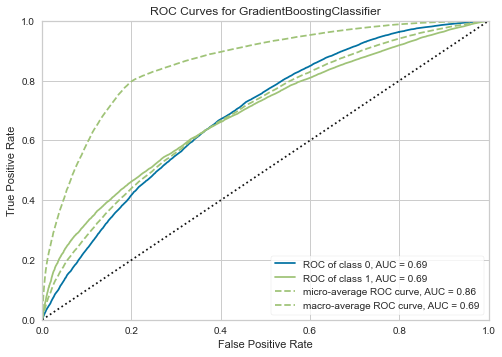

<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [161]:
visualizer = ROCAUC(
    model2, classes=classes, is_fitted=True
)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

### Learning Curve 

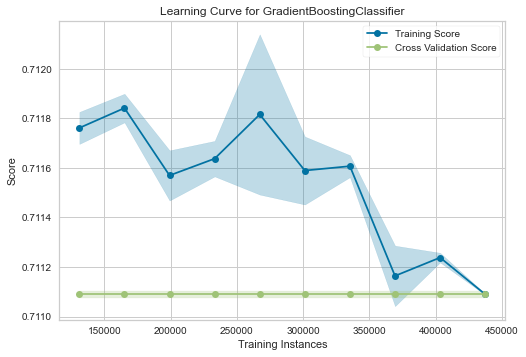

<AxesSubplot:title={'center':'Learning Curve for GradientBoostingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [163]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve


# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    GradientBoostingClassifier(random_state=5,n_estimators=40), 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.poof()                       # Finalize and render the figure

### Discrimintation Threshold 

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda\lib\site-packages\sk

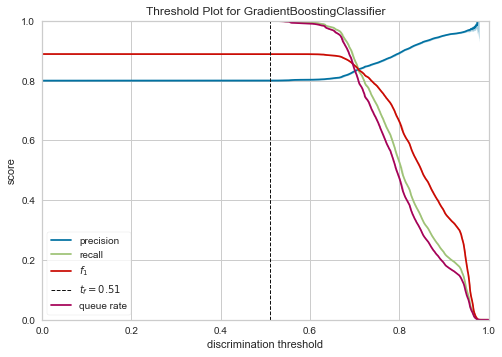

<AxesSubplot:title={'center':'Threshold Plot for GradientBoostingClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [164]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(model2, is_fitted=True)

visualizer.fit(X_train, y_train)
visualizer.poof() 

### Feature Importance 

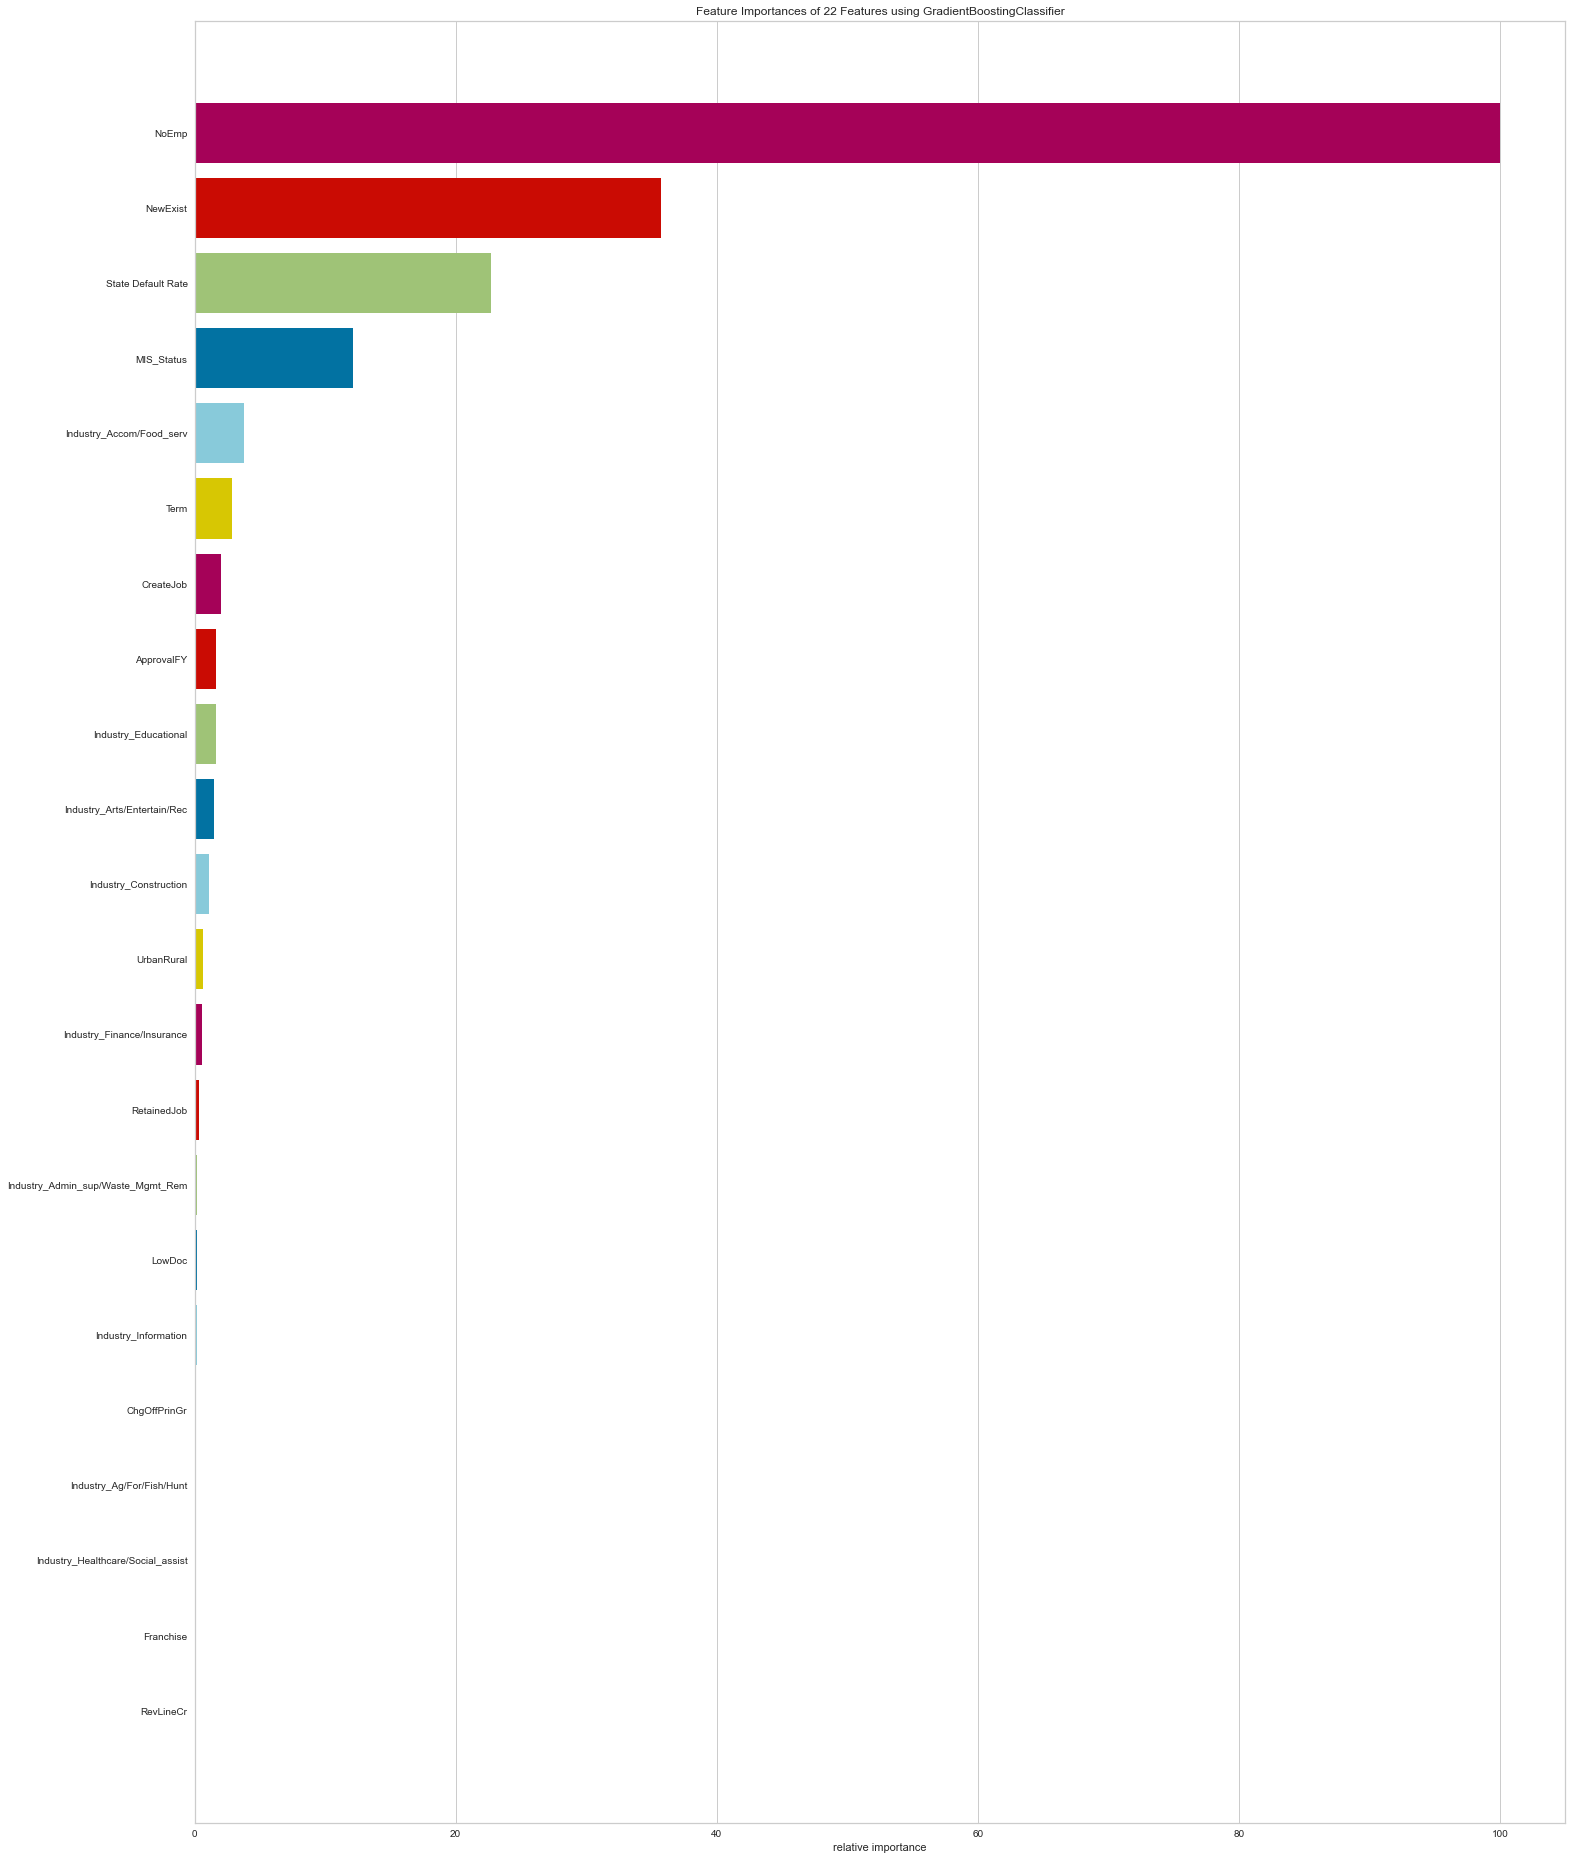

<AxesSubplot:title={'center':'Feature Importances of 22 Features using GradientBoostingClassifier'}, xlabel='relative importance'>

In [165]:
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(22, 26))
viz = FeatureImportances(model2, labels=df.columns)
viz.fit(X_train, y_train)
viz.poof()

### Grid Search For HyperParameter tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
   
    {'max_depth':[1,8],'min_samples_split':[5,15],'min_samples_leaf':[4,9],'n_estimators':[75,200]}


  ]

model2 = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(model2, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True, verbose=10)
grid_search.fit(X, y)